In [12]:
!pip install Pillow

In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [14]:
!pip install Pillow

In [2]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [5]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [7]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [9]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [10]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
from tqdm.notebook import tqdm

In [18]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode = 'grayscale' )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [19]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [21]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [22]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [23]:
x_train = train_features/255.0
x_test = test_features/255.0

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [27]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 46, 46, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,232,199 (16.14 MB)

 Trainable params: 4,232,199 (16.14 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 203s 880ms/step - accuracy: 0.2322 - loss: 1.8432 - val_accuracy: 0.2621 - val_loss: 1.8008
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 184s 813ms/step - accuracy: 0.2558 - loss: 1.7908 - val_accuracy: 0.3115 - val_loss: 1.6876
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 179s 790ms/step - accuracy: 0.3265 - loss: 1.6630 - val_accuracy: 0.4265 - val_loss: 1.4837
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 173s 765ms/step - accuracy: 0.4144 - loss: 1.5118 - val_accuracy: 0.4728 - val_loss: 1.3676
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 141s 623ms/step - accuracy: 0.4442 - loss: 1.4420 - val_accuracy: 0.4960 - val_loss: 1.3079
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 139s 613ms/step - accuracy: 0.4630 - loss: 1.3914 - val_accuracy: 0.5140 - val_loss: 1.2631
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 145s 641ms/step - accuracy: 0.4797 - loss: 1.3565 - val_accuracy: 0.5236 - val_loss: 1.2445
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 143s 631ms/step - accuracy: 

KeyboardInterrupt: 

In [32]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [33]:
from keras.models import model_from_json

In [34]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [35]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [38]:
def ef(image):
    img = load_img(image,color_mode = 'grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [49]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  sad


In [53]:
!pip install matplotlib

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
model prediction is  sad


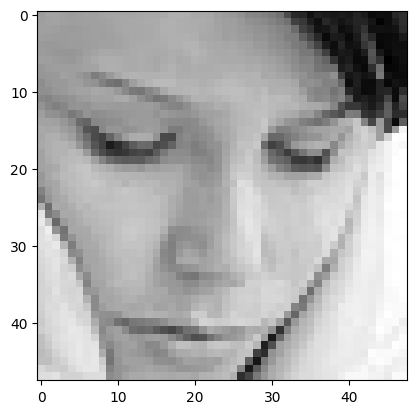

In [55]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
model prediction is  sad


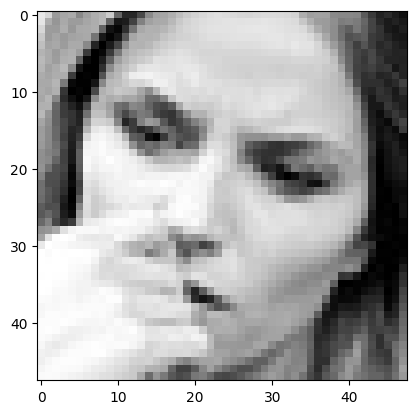

In [56]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
model prediction is  fear


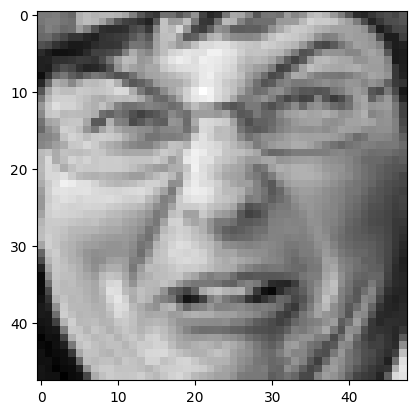

In [57]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
model prediction is  happy


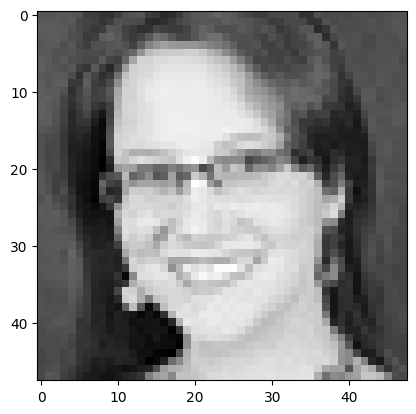

In [58]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
model prediction is  neutral


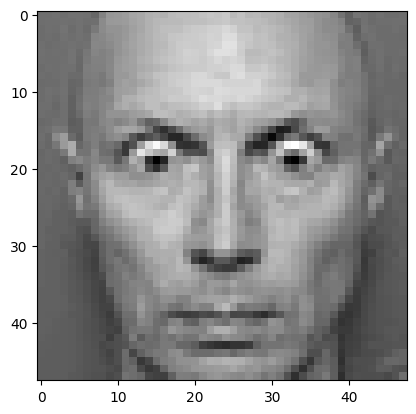

In [59]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [1]:
!pip install opencv-python

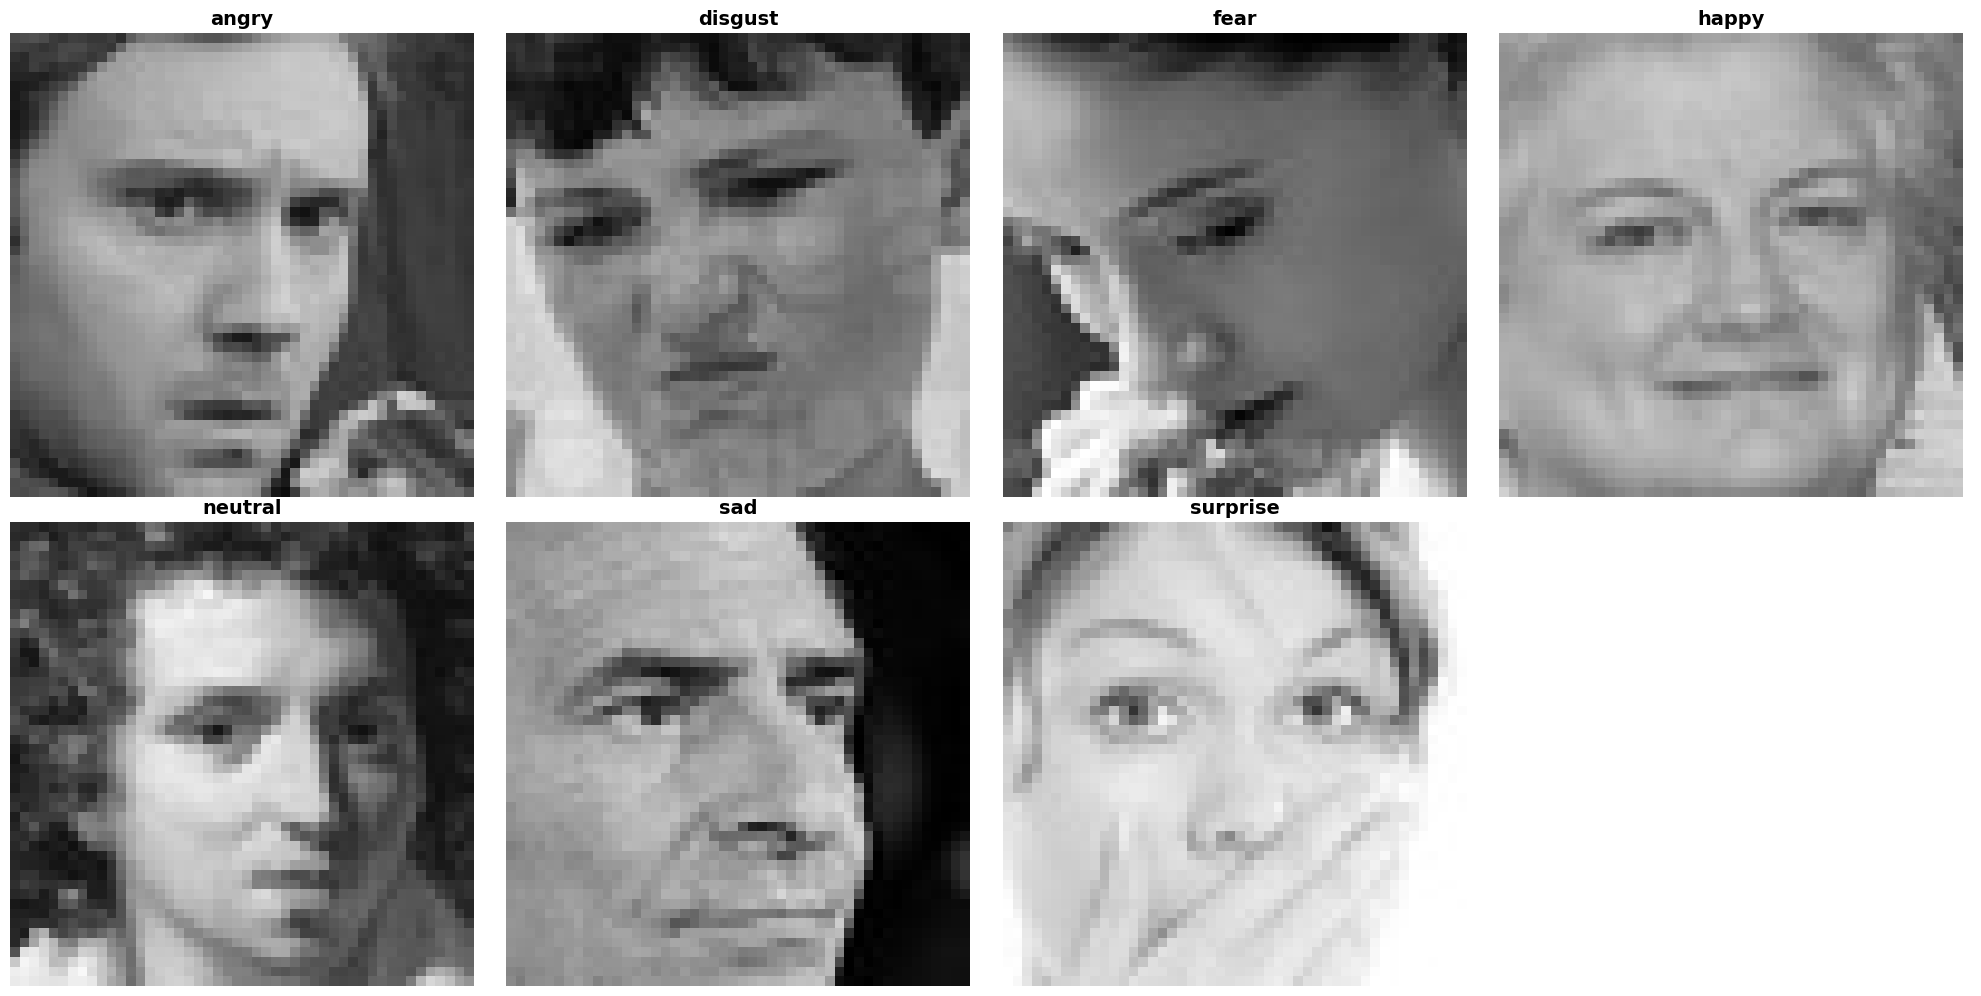

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images_with_labels(folder_path):
    emotions = os.listdir(folder_path)

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    for idx, emotion in enumerate(emotions):
 
        image_files = os.listdir(os.path.join(folder_path, emotion))
        if image_files:
            image_path = os.path.join(folder_path, emotion, image_files[0])
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            row = idx // 4
            col = idx % 4
            axs[row, col].imshow(img)
            axs[row, col].set_title(emotion, fontsize=14, fontweight='bold', color='black')
            axs[row, col].axis('off')
        else:
            print("No images found in folder:", emotion)

    axs[1, 3].axis('off')
    
    plt.tight_layout()
    plt.show()

folder_path = r'C:\Users\yatish\Documents\ise\technical seminar\yt\images\train'

display_images_with_labels(folder_path)


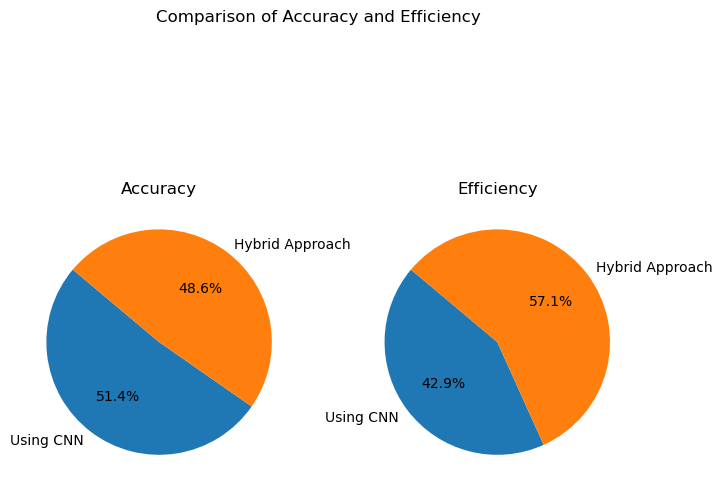

Accuracy Difference: 5%
Efficiency Difference: -1


In [4]:
import matplotlib.pyplot as plt

accuracy = [90, 85]  
efficiency = [3, 4]  

snippets = ['Using CNN', 'Hybrid Approach']
accuracy_diff = accuracy[0] - accuracy[1]
efficiency_diff = efficiency[0] - efficiency[1]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.pie(accuracy, labels=snippets, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.pie(efficiency, labels=snippets, autopct='%1.1f%%', startangle=140)
plt.title('Efficiency')

plt.suptitle('Comparison of Accuracy and Efficiency', y=1.05)
plt.show()

print(f'Accuracy Difference: {accuracy_diff}%')
print(f'Efficiency Difference: {efficiency_diff}')

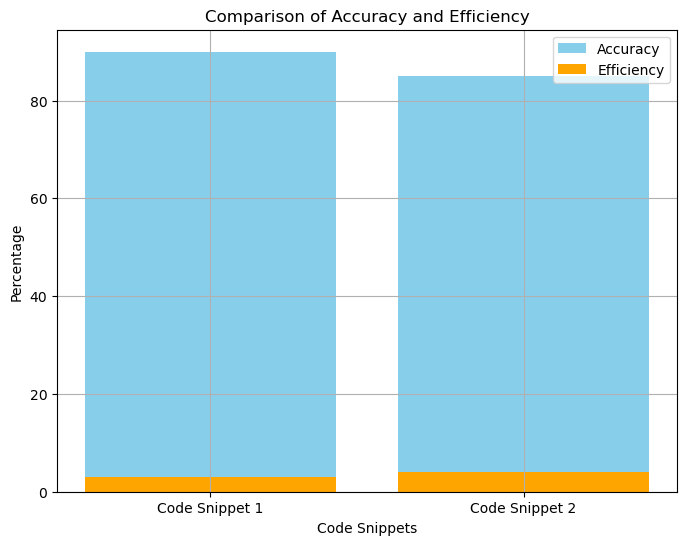

In [5]:
import matplotlib.pyplot as plt

accuracy = [90, 85] 
efficiency = [3, 4]  

snippets = ['Code Snippet 1', 'Code Snippet 2']

plt.figure(figsize=(8, 6))
plt.bar(snippets, accuracy, color='skyblue', label='Accuracy')
plt.bar(snippets, efficiency, color='orange', label='Efficiency')
plt.xlabel('Code Snippets')
plt.ylabel('Percentage')
plt.title('Comparison of Accuracy and Efficiency')
plt.legend()
plt.grid(True)
plt.show()

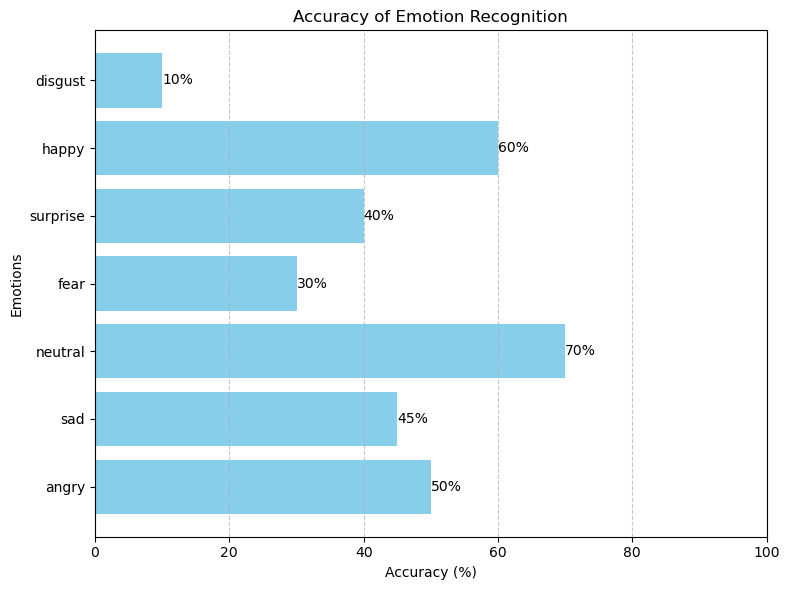

In [1]:
import matplotlib.pyplot as plt
emotions = ['angry', 'sad', 'neutral', 'fear', 'surprise', 'happy', 'disgust']
accuracy = [50, 45, 70, 30, 40, 60, 10]  
plt.figure(figsize=(8, 6))
bars = plt.barh(emotions, accuracy, color='skyblue')
plt.title('Accuracy of Emotion Recognition')
plt.xlabel('Accuracy (%)')
plt.ylabel('Emotions')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc}%', 
             va='center', ha='left', color='black', fontsize=10)
plt.tight_layout()
plt.show()